In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import cv2
import os

In [2]:
! kaggle datasets download -d paultimothymooney/breast-histopathology-images

401 - Unauthorized


In [3]:
! unzip breast-histopathology-images.zip -d breast-histopathology-images

unzip:  cannot find either breast-histopathology-images.zip or breast-histopathology-images.zip.zip.


In [4]:
data = os.listdir("./breast-histopathology-images/")
len(data)

279

In [5]:
data[:10]

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262']

In [6]:
config = {
    'ROOT_PATH' : 'breast-histopathology-images',
    'IMG_SIZE' : 200,
    'BATCH_SIZE' : 8
}

In [7]:
patient_10253 = os.listdir(os.path.join(config['ROOT_PATH'], '10253'))

In [8]:
patient_10253

['0', '1']

In [9]:
patient_10253_0 = os.listdir(os.path.join(config['ROOT_PATH'], '10253', '0'))
patient_10253_1 = os.listdir(os.path.join(config['ROOT_PATH'], '10253', '1'))

print(patient_10253_0[:5])
print(patient_10253_1[:5])

['10253_idx5_x1001_y1001_class0.png', '10253_idx5_x1001_y1051_class0.png', '10253_idx5_x1001_y1101_class0.png', '10253_idx5_x1001_y1151_class0.png', '10253_idx5_x1001_y1201_class0.png']
['10253_idx5_x501_y351_class1.png', '10253_idx5_x501_y401_class1.png', '10253_idx5_x551_y301_class1.png', '10253_idx5_x551_y351_class1.png', '10253_idx5_x551_y401_class1.png']


In [10]:
df_0 = pd.DataFrame()

for path in patient_10253_0:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 0
    
    data = {"path": os.path.join(config['ROOT_PATH'], '10253', '0', path),
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_0 = df_0.append(data, ignore_index=True)
    
    
print(df_0)

df_1 = pd.DataFrame()

for path in patient_10253_1:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 1
    
    data = {"path": os.path.join(config['ROOT_PATH'], '10253', '1', path),
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_1 = df_1.append(data, ignore_index=True)
    
df = df_0.append(df_1).reset_index(drop=True)
df

     idc_class                                               path x_coord  \
0          0.0  breast-histopathology-images\10253\0\10253_idx...    1001   
1          0.0  breast-histopathology-images\10253\0\10253_idx...    1001   
2          0.0  breast-histopathology-images\10253\0\10253_idx...    1001   
3          0.0  breast-histopathology-images\10253\0\10253_idx...    1001   
4          0.0  breast-histopathology-images\10253\0\10253_idx...    1001   
..         ...                                                ...     ...   
474        0.0  breast-histopathology-images\10253\0\10253_idx...     951   
475        0.0  breast-histopathology-images\10253\0\10253_idx...     951   
476        0.0  breast-histopathology-images\10253\0\10253_idx...     951   
477        0.0  breast-histopathology-images\10253\0\10253_idx...     951   
478        0.0  breast-histopathology-images\10253\0\10253_idx...     951   

    y_coord  
0      1001  
1      1051  
2      1101  
3      1151  
4    

,idc_class,path,x_coord,y_coord
0,0.0,breast-histopathology-images\10253\0\10253_idx...,1001,1001
1,0.0,breast-histopathology-images\10253\0\10253_idx...,1001,1051
2,0.0,breast-histopathology-images\10253\0\10253_idx...,1001,1101
3,0.0,breast-histopathology-images\10253\0\10253_idx...,1001,1151
4,0.0,breast-histopathology-images\10253\0\10253_idx...,1001,1201
...,...,...,...,...
544,1.0,breast-histopathology-images\10253\1\10253_idx...,851,601
545,1.0,breast-histopathology-images\10253\1\10253_idx...,851,651
546,1.0,breast-histopathology-images\10253\1\10253_idx...,851,701
547,1.0,breast-histopathology-images\10253\1\10253_idx...,851,751


In [11]:
df['x_coord'] = df['x_coord'].astype('int')
df['y_coord'] = df['y_coord'].astype('int')

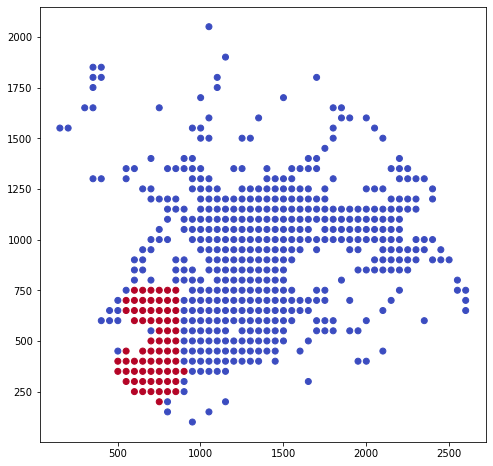

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x = df['x_coord'], y=df['y_coord'], c=df['idc_class'], cmap='coolwarm')
plt.show()

In [13]:
grid = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)

In [14]:
grid.shape

(100, 100, 3)

In [15]:
max_x = df['x_coord'].max()
max_y = df['y_coord'].max()

# Shape of (2101, 2651, 3)
# A placeholder for each pixel, with 3 color options and max values for each channel (RGB)
grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        idc_class = df['idc_class'][i]
            
        # Extract X and Y coordinates
        x_coord = df['x_coord'][i]
        y_coord = df['y_coord'][i]
        # Add 50 pixels to find ending boundary for each image
        x_end = x_coord + 50
        y_end = y_coord + 50
        
        # Assign image pixel values to placeholder 255 values
        """
        Image is something along the lines of:
        [[[206 164 226]
          [196 154 224]
          [211 175 225]
          ...
          [237 221 240]
          [214 184 232]
          [235 213 243]],
          ...        
        """
        # `grid` will then contain each patch's image values encoded into the grid
        grid[y_coord:y_end, x_coord:x_end] = image
        
        # If `idc_class` is `1`, change the RED channel of the `mask` to 255 (intense red)
        # and other channels to `0` (remove color info, leaving just red)
        if idc_class == 1:
            mask[y_coord:y_end, x_coord:x_end, :1] = 255
            mask[y_coord:y_end, x_coord:x_end, 1:] = 0

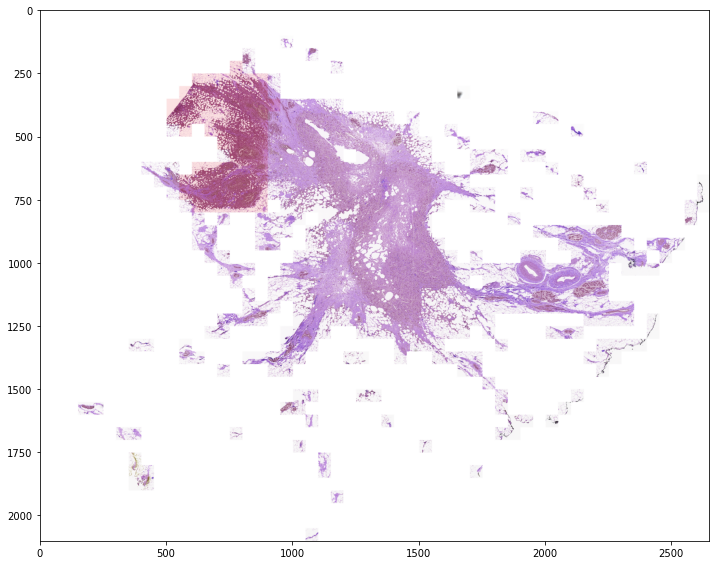

In [16]:
plt.figure(figsize=(12, 12))
plt.imshow(grid)
plt.imshow(mask, alpha=0.1)
plt.show()

In [17]:
from glob import glob
data = glob(os.path.join(config['ROOT_PATH'], '*', '*', '*'), recursive=True)
print(len(data))
# 277524

277524


In [18]:
data[:5]

['breast-histopathology-images\\10253\\0\\10253_idx5_x1001_y1001_class0.png',
 'breast-histopathology-images\\10253\\0\\10253_idx5_x1001_y1051_class0.png',
 'breast-histopathology-images\\10253\\0\\10253_idx5_x1001_y1101_class0.png',
 'breast-histopathology-images\\10253\\0\\10253_idx5_x1001_y1151_class0.png',
 'breast-histopathology-images\\10253\\0\\10253_idx5_x1001_y1201_class0.png']

In [ ]:
def get_all_dfs():
    df_all = pd.DataFrame(columns=["patient_id",
                "x_coord",
                "y_coord",
                "idc_class",
                "path"])

    for index, path in enumerate(data):
        split = path.split('_')
        # Extract elements 2 and 3, substringing the first char
        patient_id = split[0].split(os.sep)[1]
        x_coord = split[2][1:]
        y_coord = split[3][1:]
        idc_class = split[4][-5]
        
        df_data = {"patient_id": patient_id,
                "x_coord": x_coord,
                "y_coord": y_coord,
                "idc_class": idc_class,
                "path": path}

              
        df_all = df_all.append(df_data, ignore_index=True)
        df_all['x_coord'] = df_all['x_coord'].astype('int')
        df_all['y_coord'] = df_all['y_coord'].astype('int')
        df_all['idc_class'] = df_all['idc_class'].astype('int')
        print(f'Finished appending {index}/{len(data)}', end="\r")

    return df_all

In [19]:
df_all = get_all_dfs()

<AxesSubplot:xlabel='idc_class', ylabel='count'>

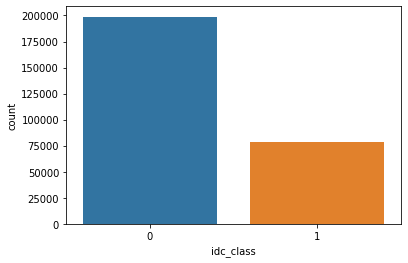

In [23]:
import seaborn as sns
sns.countplot(x='idc_class', data=df_all)

In [24]:
df_all['patient_id'].value_counts()

13693    2395
16550    2302
10288    2278
10308    2278
9323     2216
         ... 
16895     151
9175      118
8957      111
9262       94
16534      63
Name: patient_id, Length: 279, dtype: int64

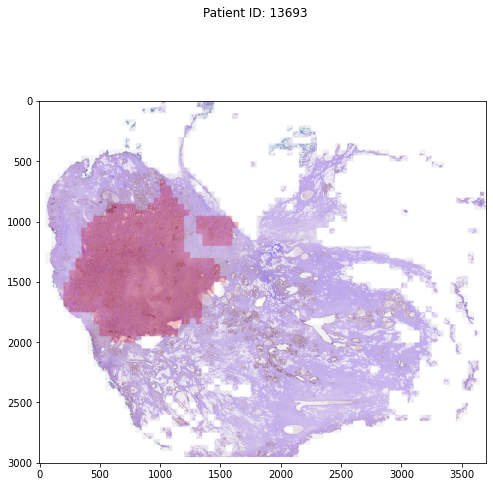

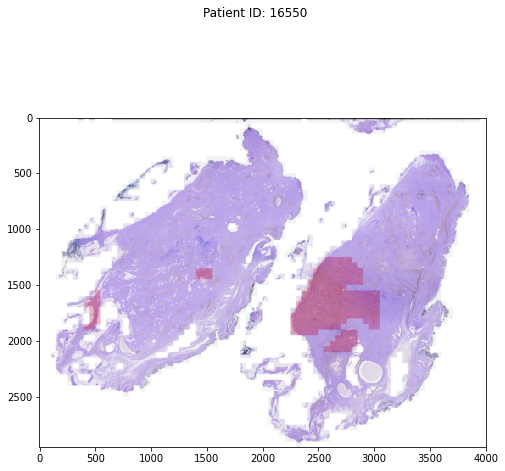

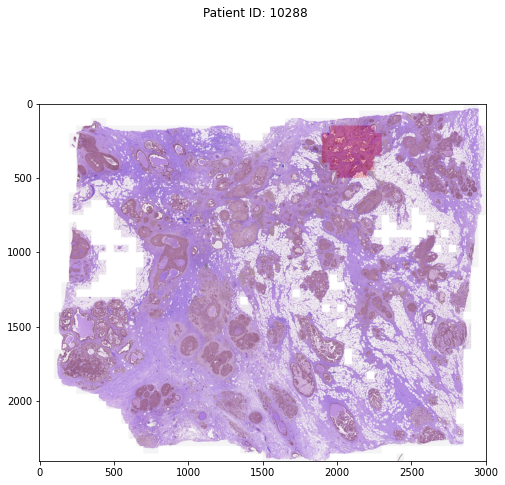

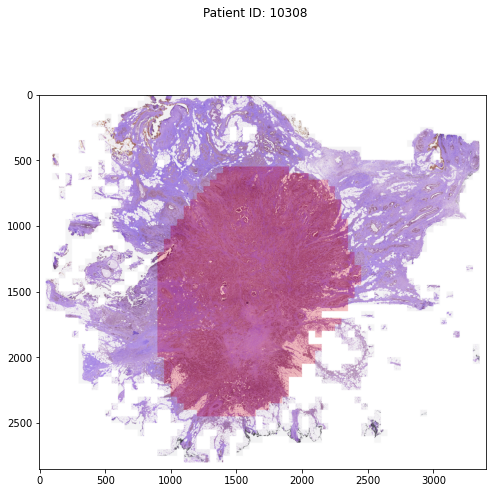

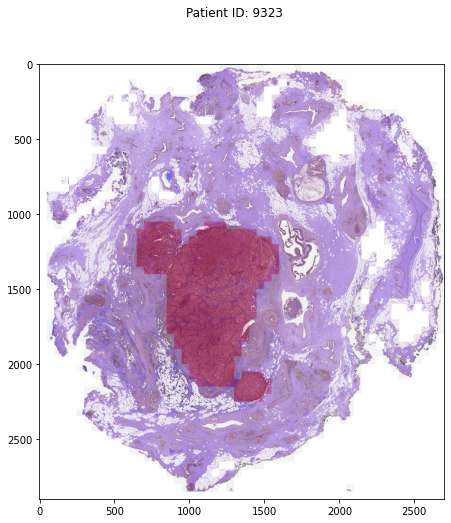

In [25]:
patient_ids = ['13693', '16550', '10288', '10308', '9323']

for patient_id in patient_ids:
    df = df_all.loc[df_all['patient_id'] == patient_id].reset_index(drop=True)
    max_x = df['x_coord'].max()
    max_y = df['y_coord'].max()
    
    grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

    for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        if(image.shape==(50, 50, 3)):
            idc_class = df['idc_class'][i]
            x_coord = df['x_coord'][i]
            y_coord = df['y_coord'][i]
            x_end = x_coord + 50
            y_end = y_coord + 50
            
            grid[y_coord:y_end, x_coord:x_end] = image

            if idc_class == 1:
                mask[y_coord:y_end, x_coord:x_end, :1] = 255
                mask[y_coord:y_end, x_coord:x_end, 1:] = 0
                
    plt.figure(figsize=(8, 8))
    plt.suptitle(f'Patient ID: {patient_id}')
    plt.imshow(grid)
    plt.imshow(mask, alpha=0.2)
    plt.show()

In [19]:
if not os.path.exists('./hist_images/'):
    print('Making folders for hist_images')
    os.mkdir('./hist_images/')

    os.mkdir('./hist_images/train/')
    os.mkdir('./hist_images/test/')
    os.mkdir('./hist_images/valid/')

    os.mkdir('./hist_images/train/0/')
    os.mkdir('./hist_images/train/1/')
    os.mkdir('./hist_images/test/0/')
    os.mkdir('./hist_images/test/1/')
    
    os.mkdir('./hist_images/valid/0/')
    os.mkdir('./hist_images/valid/1/')
    
    print('hist_images not processed, processing now')
    for batch_num, indices in enumerate(range(1000, len(data), 1000), 1):
        X = []
        y = []

        for i in data[indices-1000:indices]:
            if i.endswith('.png'):
                label=i[-5]
                img = cv2.imread(i)
                if img.shape == (50, 50, 3):
                    X.append(img)
                    y.append(label)


        X = np.array(X)
        y = np.array(y)

        print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}', end='\r')

        X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.4, stratify=y)

        for index, img in enumerate(X_train):
            idc_class = y_train[index]
            path = os.path.join('hist_images', 'train', str(idc_class), f'batch_{batch_num}_sample_{index}.png')
            cv2.imwrite(path, img.astype('int'))

        for index, img in enumerate(X_test):
            if index%2 == 0:
                idc_class = y_test[index]
                path = os.path.join('hist_images', 'test', str(idc_class), f'batch_{batch_num}_sample_{index}.png')
                cv2.imwrite(path, img.astype('int'))
            else:
                idc_class = y_test[index]
                path = os.path.join('hist_images', 'valid', str(idc_class), f'batch_{batch_num}_sample_{index}.png')
                cv2.imwrite(path, img.astype('int'))

In [20]:
if not os.path.exists('./hist_images_small/'):
    print('Making folders for hist_images_small')
    os.mkdir('./hist_images_small/')

    os.mkdir('./hist_images_small/train/')
    os.mkdir('./hist_images_small/test/')
    os.mkdir('./hist_images_small/valid/')

    os.mkdir('./hist_images_small/train/0/')
    os.mkdir('./hist_images_small/train/1/')
    os.mkdir('./hist_images_small/test/0/')
    os.mkdir('./hist_images_small/test/1/')
    
    os.mkdir('./hist_images_small/valid/0/')
    os.mkdir('./hist_images_small/valid/1/')
    
    
    print('hist_images_small not processed, processing now')
    for batch_num, indices in enumerate(range(1000, int(len(data)/10), 1000), 1):
        X = []
        y = []

        for i in data[indices-1000:indices]:
            if i.endswith('.png'):
                label=i[-5]
                img = cv2.imread(i)
                if img.shape == (50, 50, 3):
                    X.append(img)
                    y.append(label)


        X = np.array(X)
        y = np.array(y)

        print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}', end='\r')

        X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.4, stratify=y)

        for index, img in enumerate(X_train):
            idc_class = y_train[index]
            path = os.path.join('hist_images_small', 'train', str(idc_class), f'batch_{batch_num}_sample_{index}.png')
            cv2.imwrite(path, img.astype('int'))

        for index, img in enumerate(X_test):
            if index%2 == 0:
                idc_class = y_test[index]
                path = os.path.join('hist_images_small', 'test', str(idc_class), f'batch_{batch_num}_sample_{index}.png')
                cv2.imwrite(path, img.astype('int'))
            else:
                idc_class = y_test[index]
                path = os.path.join('hist_images_small', 'valid', str(idc_class), f'batch_{batch_num}_sample_{index}.png')
                cv2.imwrite(path, img.astype('int'))

In [21]:
train_paths = glob(os.path.join('hist_images', 'train', '*', '*'), recursive=True)
test_paths = glob(os.path.join('hist_images', 'test', '*', '*'), recursive=True)
valid_paths = glob(os.path.join('hist_images', 'valid', '*', '*'), recursive=True)

train_paths_small = glob(os.path.join('hist_images_small', 'train', '*', '*'), recursive=True)
test_paths_small = glob(os.path.join('hist_images_small', 'test', '*', '*'), recursive=True)
valid_paths_small = glob(os.path.join('hist_images_small', 'valid', '*', '*'), recursive=True)

In [22]:
print(len(train_paths))
print(len(test_paths))
print(len(test_paths))

164759
54996
54996


In [23]:
print(len(train_paths_small))
print(len(test_paths_small))
print(len(test_paths_small))

16167
5393
5393


In [24]:
train_paths[:5]

['hist_images\\train\\0\\batch_100_sample_0.png',
 'hist_images\\train\\0\\batch_100_sample_1.png',
 'hist_images\\train\\0\\batch_100_sample_10.png',
 'hist_images\\train\\0\\batch_100_sample_100.png',
 'hist_images\\train\\0\\batch_100_sample_102.png']

In [25]:
def get_labels(pathlist):
    labels = []
    for path in pathlist:
        labels.append(int(path.split('\\')[2]))
    labels = np.array(labels)
    return labels

train_labels = get_labels(train_paths)
test_labels = get_labels(test_paths)
valid_labels = get_labels(valid_paths)

train_labels_small = get_labels(train_paths_small)
test_labels_small = get_labels(test_paths_small)
valid_labels_small = get_labels(valid_paths_small)

In [26]:
train_labels[:5]

array([0, 0, 0, 0, 0])

In [27]:
def preprocess(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, size=[config['IMG_SIZE'], config['IMG_SIZE']])
    img = tf.cast(img, tf.float32)
    
    label = tf.cast(label, tf.float32)

    return img, label

In [28]:
def create_dataset(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels)).shuffle(len(images))
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(config['BATCH_SIZE'], drop_remainder=True).prefetch(tf.data.AUTOTUNE)
    return dataset

In [29]:
train_set = create_dataset(train_paths, train_labels)
test_set = create_dataset(test_paths, test_labels)
valid_set = create_dataset(valid_paths, valid_labels)

train_set_small = create_dataset(train_paths_small, train_labels_small)
test_set_small = create_dataset(test_paths_small, test_labels_small)
valid_set_small = create_dataset(valid_paths_small, valid_labels_small)

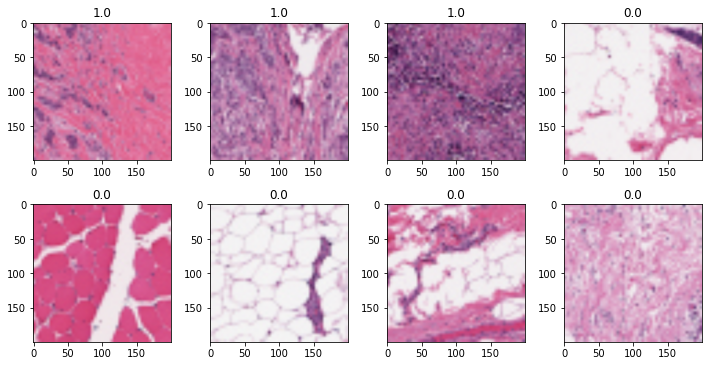

In [30]:
for img_batch, label_batch in valid_set_small.take(1):
    fig = plt.figure(figsize=(10,10))
    for i in range(len(img_batch)):
        ax = fig.add_subplot(4,4,i+1)
        ax.imshow(img_batch[i].numpy().astype('int'))
        ax.set_title(label_batch[i].numpy())
plt.tight_layout()

In [31]:
class_weights = {0:1, 1:3}

In [40]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[config['IMG_SIZE'], config['IMG_SIZE'], 3]),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.15),
    keras.layers.RandomFlip("horizontal"),
    
    keras.layers.Conv2D(32, 3, activation='relu', padding='same',),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 200, 200, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 200, 200, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                      

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_custom.h5', save_best_only=True)
]

model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history = model.fit(train_set_small,
                     validation_data = valid_set_small,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Epoch 1/15
2020/2020 [==============================] - 135s 65ms/step - loss: 0.7632 - binary_accuracy: 0.7530 - precision: 0.4821 - recall: 0.7942 - auc: 0.8298 - val_loss: 0.5842 - val_binary_accuracy: 0.7868 - val_precision: 0.8104 - val_recall: 0.1337 - val_auc: 0.8489
Epoch 2/15
2020/2020 [==============================] - 130s 64ms/step - loss: 0.6959 - binary_accuracy: 0.7782 - precision: 0.5156 - recall: 0.8135 - auc: 0.8541 - val_loss: 1.0405 - val_binary_accuracy: 0.7626 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7961
Epoch 3/15
2020/2020 [==============================] - 130s 65ms/step - loss: 0.6696 - binary_accuracy: 0.7925 - precision: 0.5360 - recall: 0.8174 - auc: 0.8656 - val_loss: 0.4523 - val_binary_accuracy: 0.8001 - val_precision: 0.7965 - val_recall: 0.2141 - val_auc: 0.8604
Epoch 4/15
2020/2020 [==============================] - 130s 64ms/step - loss: 0.6683 - binary_accuracy: 0.7824 - precision: 0.5211 - recall: 0.8249 - auc: 0.8654 - va

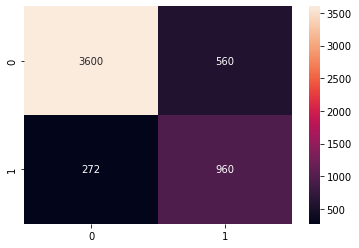

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      4160
         1.0       0.63      0.78      0.70      1232

    accuracy                           0.85      5392
   macro avg       0.78      0.82      0.80      5392
weighted avg       0.86      0.85      0.85      5392



In [42]:
model = keras.models.load_model('breast_cancer_custom.h5')

y_pred = np.array([])
y_true_small = np.array([])
count = 0

for x, y in test_set_small:
    print(f'Evaluating batch {count}/{len(test_set_small)}', end='\r')
    count += 1
    y_pred = np.concatenate([y_pred, model(x).numpy().flatten()])
    y_true_small = np.concatenate([y_true_small, y.numpy()])
    
sns.heatmap(confusion_matrix(y_true_small, np.round(y_pred)), annot=True, fmt='g')
plt.show()

print(sklearn.metrics.classification_report(y_true_small, np.round(y_pred)))

In [43]:
model2 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[config['IMG_SIZE'], config['IMG_SIZE'], 3]),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.15),
    keras.layers.RandomFlip("horizontal"),
    keras.applications.EfficientNetV2S(weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetv2s.h5', save_best_only=True),
]

model2.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history2 = model2.fit(train_set_small,
                     validation_data = valid_set_small,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomRo  (None, 200, 200, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 200, 200, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 200, 200, 3)       0         
                                                                 
 efficientnetv2-s (Functiona  (None, None, None, 1280)  20331360 
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                      

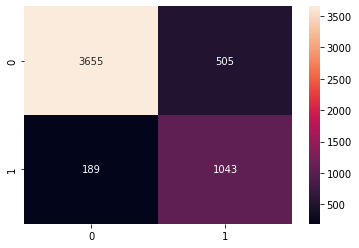

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      4160
         1.0       0.67      0.85      0.75      1232

    accuracy                           0.87      5392
   macro avg       0.81      0.86      0.83      5392
weighted avg       0.89      0.87      0.88      5392



In [44]:
model2 = keras.models.load_model('breast_cancer_effnetv2s.h5')

y_pred = np.array([])
y_true_small = np.array([])
count = 0

for x, y in test_set_small:
    print(f'Evaluating batch {count}/{len(test_set_small)}', end='\r')
    count += 1
    y_pred = np.concatenate([y_pred, model2(x).numpy().flatten()])
    y_true_small = np.concatenate([y_true_small, y.numpy()])
    
sns.heatmap(confusion_matrix(y_true_small, np.round(y_pred)), annot=True, fmt='g')
plt.show()

print(sklearn.metrics.classification_report(y_true_small, np.round(y_pred)))

In [45]:
model3 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[config['IMG_SIZE'], config['IMG_SIZE'], 3]),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.15),
    keras.layers.RandomFlip("horizontal"),
    keras.applications.ResNet101(weights='imagenet', include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_resnet101.h5',  save_best_only=True)
]

model3.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history3 = model3.fit(train_set_small,
                     validation_data = valid_set_small,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_2 (RandomRo  (None, 200, 200, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 200, 200, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 200, 200, 3)       0         
                                                                 
 resnet101 (Functional)      (None, None, None, 2048)  42658176  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                

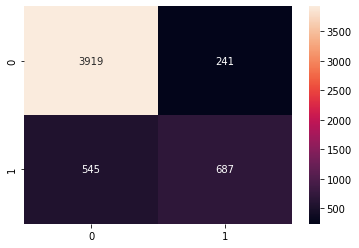

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4160
         1.0       0.74      0.56      0.64      1232

    accuracy                           0.85      5392
   macro avg       0.81      0.75      0.77      5392
weighted avg       0.85      0.85      0.85      5392



In [46]:
model3 = keras.models.load_model('breast_cancer_resnet101.h5')

y_pred = np.array([])
y_true_small = np.array([])
count = 0

for x, y in test_set_small:
    print(f'Evaluating batch {count}/{len(test_set_small)}', end='\r')
    count += 1
    y_pred = np.concatenate([y_pred, model3(x).numpy().flatten()])
    y_true_small = np.concatenate([y_true_small, y.numpy()])
    
sns.heatmap(confusion_matrix(y_true_small, np.round(y_pred)), annot=True, fmt='g')
plt.show()

print(sklearn.metrics.classification_report(y_true_small, np.round(y_pred)))

In [47]:
model4 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[config['IMG_SIZE'], config['IMG_SIZE'], 3]),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.15),
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.applications.Xception(weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

model4.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_xception.h5',  save_best_only=True)
]

model4.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history4 = model4.fit(train_set_small,
                     validation_data = valid_set_small,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_3 (RandomRo  (None, 200, 200, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_3 (RandomZoom)  (None, 200, 200, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 200, 200, 3)       0         
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                

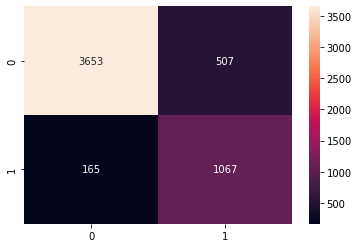

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      4160
         1.0       0.68      0.87      0.76      1232

    accuracy                           0.88      5392
   macro avg       0.82      0.87      0.84      5392
weighted avg       0.89      0.88      0.88      5392



In [48]:
model4 = keras.models.load_model('breast_cancer_xception.h5')

y_pred = np.array([])
y_true_small = np.array([])
count = 0

for x, y in test_set_small:
    print(f'Evaluating batch {count}/{len(test_set_small)}', end='\r')
    count += 1
    y_pred = np.concatenate([y_pred, model4(x).numpy().flatten()])
    y_true_small = np.concatenate([y_true_small, y.numpy()])
    
sns.heatmap(confusion_matrix(y_true_small, np.round(y_pred)), annot=True, fmt='g')
plt.show()

print(sklearn.metrics.classification_report(y_true_small, np.round(y_pred)))

674/674 [==============================] - 23s 33ms/step - loss: 0.2764 - binary_accuracy: 0.8754 - precision_3: 0.6777 - recall_3: 0.8660 - auc_3: 0.9449
              Recall  Precision       AUC
Custom CNN  0.779041   0.630921  0.910040
EffNetV2S   0.846591   0.673338  0.937398
ResNet101   0.557630   0.740302  0.896601
Xception    0.865963   0.677686  0.944932


<AxesSubplot:xlabel='variable', ylabel='value'>

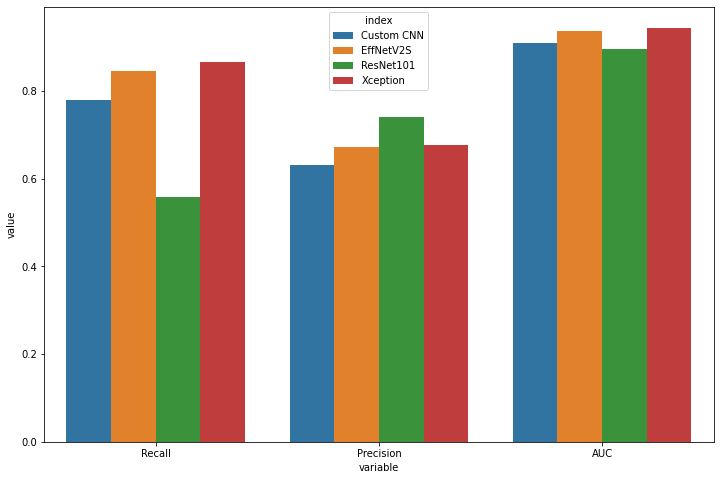

In [49]:
import seaborn as sns

# Evaluate the models to get performance stats
preds_custom = model.evaluate(test_set_small)
preds_effnet = model2.evaluate(test_set_small)
preds_resnet = model3.evaluate(test_set_small)
preds_xception = model4.evaluate(test_set_small)

# Extract into relevant model-related stats
cnn_recall, cnn_precision, cnn_auc, cnn_params = preds_custom[3], preds_custom[2], preds_custom[4], model.count_params()
effnet_recall, effnet_precision, effnet_auc, effnet_params = preds_effnet[3], preds_effnet[2], preds_effnet[4], model2.count_params()
resnet_recall, resnet_precision, resnet_auc, resnet_params = preds_resnet[3], preds_resnet[2], preds_resnet[4], model3.count_params()
xception_recall, xception_precision, xception_auc, xception_params = preds_xception[3], preds_xception[2], preds_xception[4], model4.count_params()

# Create dict to hold values
data = {
    'Custom CNN' : [cnn_recall, cnn_precision, cnn_auc],
    'EffNetV2S' : [effnet_recall, effnet_precision, effnet_auc],
    'ResNet101' : [resnet_recall, resnet_precision, resnet_auc],
    'Xception' : [xception_recall, xception_precision, xception_auc]
}

# Dict to DF
df = pd.DataFrame(data, index = ["Recall", "Precision", "AUC"]).T

print(df)

fig, ax = plt.subplots(figsize=(12, 8))

df_bar = df.reset_index().melt(id_vars=["index"])
sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax=ax)

In [32]:
import keras_tuner as kt
def build_effnet(hp):
    model = keras.Sequential()
    keras.layers.InputLayer(input_shape=[config['IMG_SIZE'], config['IMG_SIZE'], 3]),
    keras.layers.RandomRotation(hp.Choice('random_rot', [0.10, 0.15, 0.20, 0.3])),
    keras.layers.RandomZoom(hp.Choice('random_zoom', [0.10, 0.15, 0.20, 0.3])),
    keras.layers.RandomFlip(hp.Choice('Bflip', ['horizontal', 'vertical', 'horizontal_and_vertical'])),
    model.add(keras.applications.EfficientNetV2S(weights='imagenet', include_top=False))
    model.add(keras.layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dropout(hp.Choice('dropout', [0.2, 0.3, 0.4])))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

    return model


In [33]:
tuner = kt.Hyperband(
    build_effnet,
    objective='val_loss',
    max_epochs=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [63]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
random_rot (Choice)
{'default': 0.05, 'conditions': [], 'values': [0.05, 0.1, 0.15, 0.2, 0.3], 'ordered': True}
random_zoom (Choice)
{'default': 0.05, 'conditions': [], 'values': [0.05, 0.1, 0.15, 0.2, 0.3], 'ordered': True}
flip (Choice)
{'default': 'horizontal', 'conditions': [], 'values': ['horizontal', 'vertical', 'horizontal_and_vertical'], 'ordered': False}
dropout (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.3, 0.4], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'nadam'], 'ordered': False}


In [34]:
config['BATCH_SIZE'] = 2

In [35]:
train_set_small = create_dataset(train_paths_small, train_labels_small)
test_set_small = create_dataset(test_paths_small, test_labels_small)
valid_set_small = create_dataset(valid_paths_small, valid_labels_small)

In [36]:
tuner.search(train_set_small, 
             epochs=5, 
             validation_data=valid_set_small)

Trial 3 Complete [01h 38m 11s]
val_loss: 0.3385772109031677

Best val_loss So Far: 0.305325448513031
Total elapsed time: 04h 54m 52s
INFO:tensorflow:Oracle triggered exit


In [38]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
random_rot: 0.2
random_zoom: 0.2
flip: vertical
dropout: 0.3
optimizer: sgd
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.305325448513031
Trial summary
Hyperparameters:
random_rot: 0.1
random_zoom: 0.2
flip: horizontal
dropout: 0.4
optimizer: adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.30964744091033936
Trial summary
Hyperparameters:
random_rot: 0.1
random_zoom: 0.05
flip: horizontal
dropout: 0.4
optimizer: nadam
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.313693106174469
Trial summary
Hyperparameters:
random_rot: 0.1
random_zoom: 0.2
flip: horizontal
dropout: 0.4
optimizer: adam
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: ee082f7d2b91bf5841d9fcc29f9d9d89
Score: 0.31625083088874817
Trial summa

In [56]:
tuned_model = tuner.get_best_models()[0]

In [57]:
tuned_model.save('breast_cancer_tuned_baseline.h5')

In [40]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.cast(K.round(y_pred), 'float32')
    tp = K.sum(K.cast(y_true*y_pred, 'float32'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float32'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float32'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float32'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float32'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float32'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float32'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float32'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [41]:
model_f1_loss = keras.models.load_model('breast_cancer_tuned_baseline.h5')

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=6),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnet_f1_loss.h5',  save_best_only=True, monitor="val_f1"),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5)
]

model_f1_loss.compile(loss=f1_loss,
              optimizer='adam',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

model_f1_loss_history = model_f1_loss.fit(train_set_small,
                     validation_data=valid_set_small,
                     callbacks=callbacks,
                     epochs=15,
                    class_weight=class_weights)

Epoch 1/15
8083/8083 [==============================] - 1205s 148ms/step - loss: 0.7980 - f1: 0.3128 - binary_accuracy: 0.4411 - precision_1: 0.2755 - recall_1: 0.8570 - auc_1: 0.5868 - val_loss: 0.7013 - val_f1: 0.2987 - val_binary_accuracy: 0.2375 - val_precision_1: 0.2375 - val_recall_1: 1.0000 - val_auc_1: 0.5000 - lr: 0.0010
Epoch 2/15
8083/8083 [==============================] - 1191s 147ms/step - loss: 0.8569 - f1: 0.2815 - binary_accuracy: 0.3695 - precision_1: 0.2467 - recall_1: 0.8297 - auc_1: 0.5301 - val_loss: 0.8829 - val_f1: 0.1169 - val_binary_accuracy: 0.4601 - val_precision_1: 0.1641 - val_recall_1: 0.3109 - val_auc_1: 0.4073 - lr: 0.0010
Epoch 3/15
8083/8083 [==============================] - 1188s 147ms/step - loss: 0.8280 - f1: 0.2993 - binary_accuracy: 0.4555 - precision_1: 0.2722 - recall_1: 0.7973 - auc_1: 0.5762 - val_loss: 0.7093 - val_f1: 0.2904 - val_binary_accuracy: 0.2475 - val_precision_1: 0.2369 - val_recall_1: 0.9766 - val_auc_1: 0.4937 - lr: 0.0010
Epoc

In [50]:
config['BATCH_SIZE'] = 8

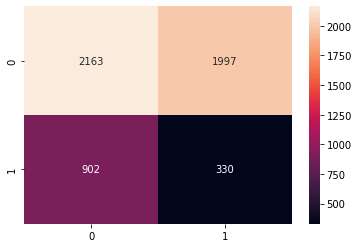

              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60      4160
         1.0       0.14      0.27      0.19      1232

    accuracy                           0.46      5392
   macro avg       0.42      0.39      0.39      5392
weighted avg       0.58      0.46      0.50      5392



In [51]:
model_f1_loss = keras.models.load_model('breast_cancer_effnet_f1_loss.h5', custom_objects={'f1_loss':f1_loss, 'f1':f1})

y_pred = np.array([])
y_true_small = np.array([])
count = 0

for x, y in test_set_small:
    print(f'Evaluating batch {count}/{len(test_set_small)}', end='\r')
    count += 1
    y_pred = np.concatenate([y_pred, model_f1_loss(x).numpy().flatten()])
    y_true_small = np.concatenate([y_true_small, y.numpy()])
    
sns.heatmap(confusion_matrix(y_true_small, np.round(y_pred)), annot=True, fmt='g')
plt.show()

print(sklearn.metrics.classification_report(y_true_small, np.round(y_pred)))

In [52]:
test_set.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(8, 200, 200, None), dtype=tf.float32, name=None), TensorSpec(shape=(8,), dtype=tf.float32, name=None))>

In [58]:
model_tuned = keras.models.load_model('breast_cancer_tuned_baseline.h5', custom_objects={'f1':f1})

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=6),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnet_tuned.h5',  save_best_only=True, monitor="val_f1"),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5)
]

model_tuned.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

model_tuned_history = model_tuned.fit(train_set,
                     validation_data=valid_set,
                     callbacks=callbacks,
                     epochs=15,
                    class_weight=class_weights)

Epoch 1/15
20594/20594 [==============================] - 4137s 200ms/step - loss: 0.5769 - f1: 0.6968 - binary_accuracy: 0.8300 - precision_1: 0.6524 - recall_1: 0.8701 - auc_1: 0.9159 - val_loss: 0.3482 - val_f1: 0.7211 - val_binary_accuracy: 0.8539 - val_precision_1: 0.6844 - val_recall_1: 0.9118 - val_auc_1: 0.9459 - lr: 0.0100
Epoch 2/15
20594/20594 [==============================] - 4107s 199ms/step - loss: 0.4982 - f1: 0.7282 - binary_accuracy: 0.8575 - precision_1: 0.6964 - recall_1: 0.8915 - auc_1: 0.9373 - val_loss: 0.3315 - val_f1: 0.7299 - val_binary_accuracy: 0.8541 - val_precision_1: 0.6792 - val_recall_1: 0.9324 - val_auc_1: 0.9529 - lr: 0.0100
Epoch 3/15
20594/20594 [==============================] - 4077s 198ms/step - loss: 0.4632 - f1: 0.7387 - binary_accuracy: 0.8670 - precision_1: 0.7114 - recall_1: 0.9018 - auc_1: 0.9457 - val_loss: 0.2867 - val_f1: 0.7547 - val_binary_accuracy: 0.8781 - val_precision_1: 0.7280 - val_recall_1: 0.9185 - val_auc_1: 0.9575 - lr: 0.010

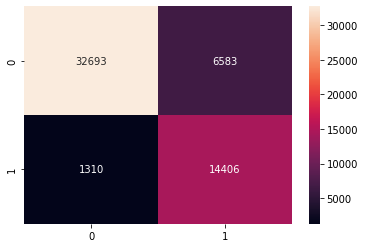

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     39276
         1.0       0.69      0.92      0.78     15716

    accuracy                           0.86     54992
   macro avg       0.82      0.87      0.84     54992
weighted avg       0.88      0.86      0.86     54992



In [59]:
model_tuned = keras.models.load_model('breast_cancer_effnet_tuned.h5', custom_objects={'f1':f1})

y_pred = np.array([])
y_true = np.array([])
count = 0

for x, y in test_set:
    print(f'Evaluating batch {count}/{len(test_set)}', end='\r')
    count += 1
    y_pred = np.concatenate([y_pred, model_tuned(x).numpy().flatten()])
    y_true = np.concatenate([y_true, y.numpy()])
    
sns.heatmap(confusion_matrix(y_true, np.round(y_pred)), annot=True, fmt='g')
plt.show()

print(sklearn.metrics.classification_report(y_true, np.round(y_pred)))

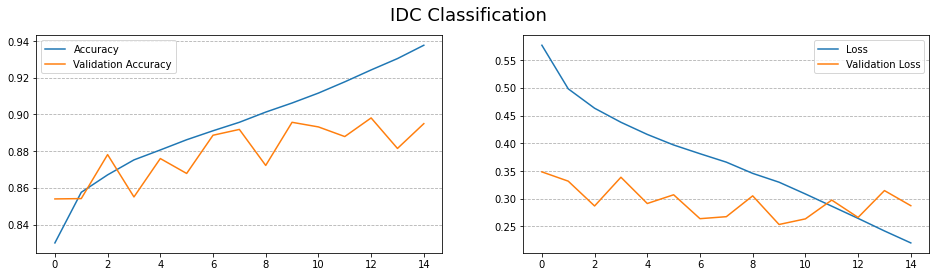

In [62]:
acc, val_acc = model_tuned_history.history['binary_accuracy'], model_tuned_history.history['val_binary_accuracy']
loss, val_loss = model_tuned_history.history['loss'], model_tuned_history.history['val_loss']
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('IDC Classification', fontsize=18)

ax[0].plot(acc, label='Accuracy')
ax[0].plot(val_acc, label='Validation Accuracy')
ax[0].grid(axis='y', linestyle='--')

ax[1].plot(loss, label='Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].grid(axis='y', linestyle='--')

ax[0].legend()
ax[1].legend()
plt.show()